Investigating Momentum

1) Is momentum still profitable?

In [200]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0,'../cmds')
import portfolio_management_helper as pmh

momentum_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="momentum (excess returns)")
factor_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="factors (excess returns)")
rts_df = pd.concat([momentum_rts, factor_rts], axis=1)
rts_df


,UMD,MKT,SMB,HML
date,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454
1927-02-28,-0.0214,0.0418,0.0004,0.0294
1927-03-31,0.0361,0.0013,-0.0165,-0.0261
1927-04-30,0.0430,0.0046,0.0030,0.0081
1927-05-31,0.0300,0.0544,0.0153,0.0473
...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166
2024-06-30,0.0090,0.0277,-0.0306,-0.0331
2024-07-31,-0.0242,0.0124,0.0680,0.0573


In [201]:
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1927-2024": ["1927", "2024"],
        "1927-1993": ["1927", "1993"],
        "1994-2008": ["1994", "2008"],
        "2009-2024": ["2009", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1927-2024,0.0753,0.1625,0.4635,-2.9905,-0.3443,-0.4064
UMD 1927-1993,0.0901,0.1600,0.5630,-3.8082,-0.3625,-0.4950
UMD 1994-2008,0.1044,0.1756,0.5945,-0.5820,-0.2345,-0.1294
UMD 2009-2024,-0.0151,0.1585,-0.0952,-2.6910,-0.3676,-0.3209


Momentum has varied quite a bit during these time periods. From 2009 onwards, its returns have gotten much worse, and its resulting Sharpe ratio. The skewness has varied a lot period over period.

Momentum does have a negative correlation to both the market factor and value factor. Due to that, even if it had zero mean returns, it may be an important tool for diversification.

2) Long Only Implementation

In [202]:
decile_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="size_sorts (total returns)")
rf_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="risk-free rate")
excess_decile_rts = pd.concat([decile_rts, rf_rts], axis=1)
excess_decile_rts["UMD Long"] = .5 * (excess_decile_rts["BIG HiPRIOR"] + excess_decile_rts["SMALL HiPRIOR"]) - 	excess_decile_rts["RF"]
rts_df = pd.concat([rts_df, excess_decile_rts[["UMD Long"]]], axis=1)
rts_df

,UMD,MKT,SMB,HML,UMD Long
date,,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454,-0.0005
1927-02-28,-0.0214,0.0418,0.0004,0.0294,0.0473
1927-03-31,0.0361,0.0013,-0.0165,-0.0261,-0.0020
1927-04-30,0.0430,0.0046,0.0030,0.0081,0.0232
1927-05-31,0.0300,0.0544,0.0153,0.0473,0.0670
...,...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166,0.0514
2024-06-30,0.0090,0.0277,-0.0306,-0.0331,0.0075
2024-07-31,-0.0242,0.0124,0.0680,0.0573,0.0399


In [203]:
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1994-2004": ["1994", "2004"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD","UMD Long"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1994-2004,0.0982,0.1908,0.5144,-0.6579,-0.2165,-0.0718
UMD Long 1994-2004,0.1413,0.1817,0.7774,-0.3797,0.8507,-0.5446


The long strategy is actually more attractive for Mean, Vol, and Sharpe.

However, the strategy is highly correlated to market premia, which means it lacks diversification. It does have a low correlation to value premia.

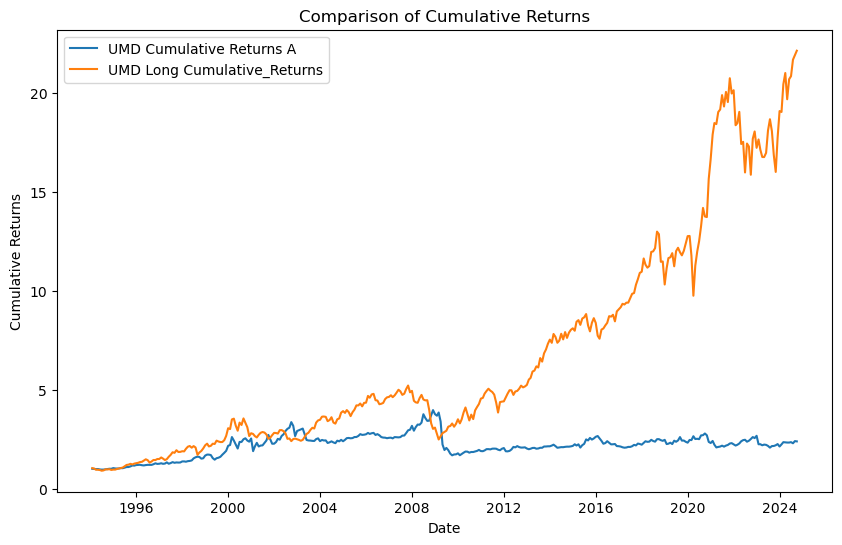

In [204]:
rts_df.index
rts_df_series = rts_df[(rts_df.index.year >= 1994) & (rts_df.index.year <= 2024)]
rts_df_series['UMD Cum'] = (1+rts_df_series['UMD']).cumprod()
rts_df_series['UMD Long Cum'] = (1+rts_df_series['UMD Long']).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(rts_df_series.index, rts_df_series['UMD Cum'], label='UMD Cumulative Returns A')
plt.plot(rts_df_series.index, rts_df_series['UMD Long Cum'], label='UMD Long Cumulative_Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Comparison of Cumulative Returns')
plt.legend()
plt.show()


3) Is momentum just data mining, or is it a robust strategy?

In [205]:
ind_decile_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="deciles (total returns)")
ind_excess_decile_rts = pd.concat([ind_decile_rts, rf_rts], axis=1)

ind_excess_decile_rts["UMD Top 1"] = ind_excess_decile_rts.iloc[:,:1].sum(axis=1) - ind_excess_decile_rts.iloc[:,-1:].sum(axis=1) 
ind_excess_decile_rts["UMD Top 3"] = (1/3) * ind_excess_decile_rts.iloc[:,:3].sum(axis=1) - (1/3) * ind_excess_decile_rts.iloc[:,-3:].sum(axis=1) 
ind_excess_decile_rts["UMD Top 5"] = (1/5) * ind_excess_decile_rts.iloc[:,:5].sum(axis=1) - (1/5) * ind_excess_decile_rts.iloc[:,-5:].sum(axis=1) 

rts_df = pd.concat([rts_df, ind_excess_decile_rts[["UMD Top 1","UMD Top 3","UMD Top 5"]]], axis=1)
rts_df

,UMD,MKT,SMB,HML,UMD Long,UMD Top 1,UMD Top 3,UMD Top 5
date,,,,,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454,-0.0005,-0.0357,-0.0051,-0.0027
1927-02-28,-0.0214,0.0418,0.0004,0.0294,0.0473,0.0727,0.0239,0.0221
1927-03-31,0.0361,0.0013,-0.0165,-0.0261,-0.0020,-0.0353,-0.0413,-0.0290
1927-04-30,0.0430,0.0046,0.0030,0.0081,0.0232,0.0179,-0.0372,-0.0164
1927-05-31,0.0300,0.0544,0.0153,0.0473,0.0670,0.0242,0.0140,0.0085
...,...,...,...,...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166,0.0514,0.0518,-0.0089,0.0007
2024-06-30,0.0090,0.0277,-0.0306,-0.0331,0.0075,-0.0285,-0.0080,-0.0092
2024-07-31,-0.0242,0.0124,0.0680,0.0573,0.0399,0.1188,0.0393,0.0382


In [206]:
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1994-2024": ["1994", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD Top 1","UMD Top 3","UMD Top 5"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD Top 1 1994-2024,0.0451,0.3411,0.1324,0.7667,0.7870,0.0254
UMD Top 3 1994-2024,0.0239,0.1266,0.1890,0.6103,0.5419,0.2985
UMD Top 5 1994-2024,0.0360,0.0930,0.3872,0.6427,0.6355,0.2679


Based on these results, as we include more deciles it seems as if  volatility and correlation to market decreases and sharpe increases, but the tradeoff is mean return declines and corrlation top HML increases, which is similar to some of the concepts we discussed in lecture.

The should consider using the 5 decile model, as it decorrelates from the market factor (which we saw as an issue earlier) while featuring a high Sharpe ratio.

In [207]:
rts_df.rename(columns={'UMD': 'UMD FF'}, inplace=True)
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1994-2024": ["1994", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD FF","UMD Top 3"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD FF 1994-2024,0.0432,0.1677,0.2575,-1.4460,-0.3062,-0.2152
UMD Top 3 1994-2024,0.0239,0.1266,0.1890,0.6103,0.5419,0.2985


While the Top 3 Decile approach features similar volatility, its Sharpe lower and correlation top MKT/HML is higher. This implies the segmentation of Large/Small stocks is important for performance when using a momentum based strategy.

4) Does implementing momentum require trading lots of small stocks—thus causing
even larger trading costs?

In [208]:
excess_decile_rts["Big Winners"] = excess_decile_rts["BIG HiPRIOR"] - excess_decile_rts["BIG LoPRIOR"]
excess_decile_rts["Small Winners"] = excess_decile_rts["SMALL HiPRIOR"] - excess_decile_rts["SMALL LoPRIOR"]

rts_df = pd.concat([rts_df, excess_decile_rts[["Big Winners","Small Winners"]]], axis=1)
rts_df

,UMD FF,MKT,SMB,HML,UMD Long,UMD Top 1,UMD Top 3,UMD Top 5,Big Winners,Small Winners
date,,,,,,,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454,-0.0005,-0.0357,-0.0051,-0.0027,0.0040,0.0032
1927-02-28,-0.0214,0.0418,0.0004,0.0294,0.0473,0.0727,0.0239,0.0221,-0.0280,-0.0150
1927-03-31,0.0361,0.0013,-0.0165,-0.0261,-0.0020,-0.0353,-0.0413,-0.0290,0.0583,0.0140
1927-04-30,0.0430,0.0046,0.0030,0.0081,0.0232,0.0179,-0.0372,-0.0164,0.0453,0.0407
1927-05-31,0.0300,0.0544,0.0153,0.0473,0.0670,0.0242,0.0140,0.0085,0.0166,0.0435
...,...,...,...,...,...,...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166,0.0514,0.0518,-0.0089,0.0007,0.0111,-0.0114
2024-06-30,0.0090,0.0277,-0.0306,-0.0331,0.0075,-0.0285,-0.0080,-0.0092,0.0250,-0.0070
2024-07-31,-0.0242,0.0124,0.0680,0.0573,0.0399,0.1188,0.0393,0.0382,-0.0676,0.0191


In [209]:
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1994-2024": ["1994", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD FF","Big Winners","Small Winners"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD FF 1994-2024,0.0432,0.1677,0.2575,-1.4460,-0.3062,-0.2152
Big Winners 1994-2024,0.0232,0.1825,0.1270,-0.8791,-0.2802,-0.2575
Small Winners 1994-2024,0.0632,0.1696,0.3726,-1.7636,-0.3040,-0.1485


Small winners do feature a higher mean return, and significantly higher Sharpe. Big winners do offer a bit less correlation with HML, but overall it seems that large winners do not deliver excess returns at comparable risk to small winners.

5) In conclusion, what is your assessment of the AQR retail product? Is it capturing the important
features of the Fama-French construction of momentum? Would you suggest any modifications?


Momentum has been profitable in the past, but its returns have dropped off since 2009 and can be inconsistent. Using more stock deciles (like the Top 5) helps spread out the risk and lowers reliance on the broader market. To improve, the AQR product could include both large and small stocks, balancing returns with lower trading costs.

Estimating Underperformance

In [210]:
BS_rts = pmh.read_excel_default("../data/barnstable_analysis_data.xlsx", sheet_name="data")
BS_rts["Excess"] = BS_rts["SPX"] - BS_rts['TB1M']
BS_rts["SPX Log"] = np.log(BS_rts["SPX"] + 1)
BS_rts["TB1M Log"] = np.log(BS_rts["TB1M"] + 1)
BS_rts["Excess Log"] = np.log(BS_rts["Excess"] + 1)
BS_rts

,SPX,TB1M,Excess,SPX Log,TB1M Log,Excess Log
date,,,,,,
1926-01-30,-0.0018,0.0031,-0.0048,-0.0018,0.0031,-0.0049
1926-02-27,-0.0333,0.0026,-0.0359,-0.0339,0.0026,-0.0366
1926-03-31,-0.0577,0.0026,-0.0603,-0.0594,0.0026,-0.0622
1926-04-30,0.0385,0.0023,0.0363,0.0378,0.0023,0.0356
1926-05-28,0.0136,0.0027,0.0109,0.0135,0.0027,0.0109
...,...,...,...,...,...,...
2024-05-31,0.0494,0.0045,0.0450,0.0482,0.0045,0.0440
2024-06-28,0.0372,0.0045,0.0327,0.0365,0.0045,0.0322
2024-07-31,0.0121,0.0045,0.0077,0.0121,0.0045,0.0077


In [211]:
df1 = pmh.calc_summary_statistics(
    returns=BS_rts,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "": ["1965", "1999"],
        # "2000-2024": ["2000", "2024"],
        # "1926-2024": ["1926", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol"],
)
df2 = pmh.calc_summary_statistics(
    returns=BS_rts,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "": ["2000", "2024"],
        # "2000-2024": ["2000", "2024"],
        # "1926-2024": ["1926", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol"],
)
df3 = pmh.calc_summary_statistics(
    returns=BS_rts,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "": ["1926", "2024"],
        # "2000-2024": ["2000", "2024"],
        # "1926-2024": ["1926", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol"],
)

summarystats = pd.concat([df1, df2,df3], axis=1)
summarystats.columns = pd.MultiIndex.from_product(
    [
        ['1965 - 1999', '2000 - 2024', '1926 - 2024'],  # Group level (names for each DataFrame's columns)
        ['Mean', 'Vol']  # Sub-columns within each group
    ]
)
summarystats

1965 - 1999        2000 - 2024        1926 - 2024       
                   Mean    Vol        Mean    Vol        Mean    Vol
SPX              0.1294 0.1494      0.0873 0.1531      0.1155 0.1868
TB1M             0.0615 0.0072      0.0172 0.0055      0.0319 0.0085
Excess           0.0687 0.1502      0.0701 0.1533      0.0833 0.1875
SPX Log          0.1176 0.1496      0.0753 0.1540      0.0978 0.1861
TB1M Log         0.0613 0.0071      0.0172 0.0055      0.0318 0.0085
Excess Log       0.0572 0.1512      0.0581 0.1545      0.0657 0.1870

After adjusting for the risk free rate, the total sample performs better for excess return than both the sub samples. The log returns show lower excess returns than the level stats.

In [212]:
BS_rts_series = BS_rts[(BS_rts.index.year >= 1965) & (BS_rts.index.year <= 1999)]

h_15_years = 15 * 12
market_cum_log_15 = BS_rts_series['SPX Log'].rolling(window=h_15_years).sum()
risk_free_cum_log_15 = BS_rts_series['TB1M Log'].rolling(window=h_15_years).sum()
prob_15_years = (market_cum_log_15 < risk_free_cum_log_15).mean()

h_30_years = 30 * 12
market_cum_log_30 = BS_rts_series['SPX Log'].rolling(window=h_30_years).sum()
risk_free_cum_log_30 = BS_rts_series['TB1M Log'].rolling(window=h_30_years).sum()
prob_30_years = (market_cum_log_30 < risk_free_cum_log_30).mean()

print("Probability for h = 15 years:", prob_15_years)
print("Probability for h = 30 years:", prob_30_years)

Probability for h = 15 years: 0.007142857142857143
Probability for h = 30 years: 0.0


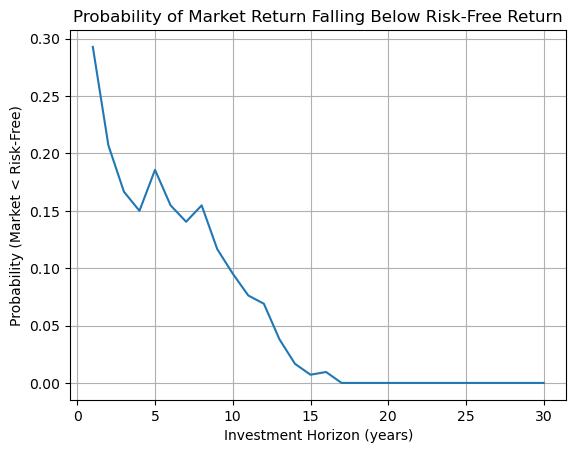

In [213]:
horizons = range(1, 31)
probabilities = []

for h in horizons:
    market_cum_log = BS_rts_series['SPX Log'].rolling(window=h*12).sum() 
    risk_free_cum_log = BS_rts_series['TB1M Log'].rolling(window=h*12).sum()
    prob = (market_cum_log < risk_free_cum_log).mean()
    probabilities.append(prob)

plt.plot(horizons, probabilities)
plt.xlabel("Investment Horizon (years)")
plt.ylabel("Probability (Market < Risk-Free)")
plt.title("Probability of Market Return Falling Below Risk-Free Return")
plt.grid()
plt.show()

In [214]:
BS_rts_series = BS_rts[(BS_rts.index.year >= 1965) & (BS_rts.index.year <= 2024)]

max_horizon = 30 * 12
probabilities = []

for h in range(1, 31):
    months = h * 12
    market_cum_log = BS_rts_series['SPX Log'].rolling(window=months).sum()
    risk_free_cum_log = BS_rts_series['TB1M Log'].rolling(window=months).sum()
    prob = (market_cum_log < risk_free_cum_log).mean()
    probabilities.append(prob)

# Print the probability for the 30-year horizon
print("Probability for h = 30 years as of 2024:", probabilities[-1])

Probability for h = 30 years as of 2024: 0.0


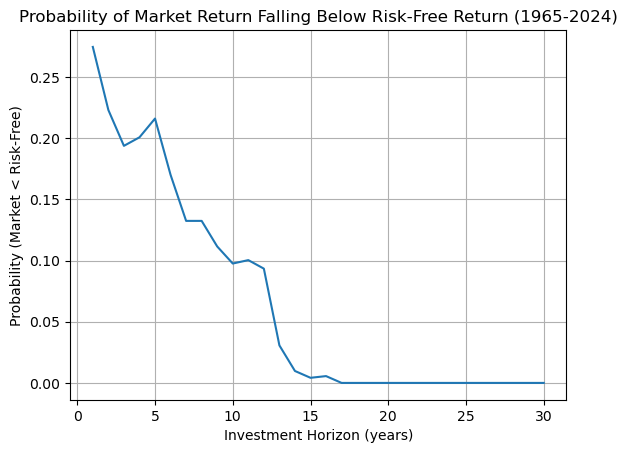

In [215]:
# Plotting the probability as a function of the investment horizon
import matplotlib.pyplot as plt

plt.plot(range(1, 31), probabilities)
plt.xlabel("Investment Horizon (years)")
plt.ylabel("Probability (Market < Risk-Free)")
plt.title("Probability of Market Return Falling Below Risk-Free Return (1965-2024)")
plt.grid()
plt.show()

In [216]:
from scipy.stats import norm

realized_25_year_return = BS_rts_series.loc['2000':'2024', 'SPX Log'].sum()
mu_1965_1999 = BS_rts_series.loc['1965':'1999', 'SPX Log'].mean()
sigma_1965_1999 = BS_rts_series.loc['1965':'1999', 'SPX Log'].std()

expected_25_year_return = mu_1965_1999 * 25
expected_25_year_stddev = sigma_1965_1999 * (25 ** 0.5)

z_score = (realized_25_year_return - expected_25_year_return) / expected_25_year_stddev

probability = norm.cdf(z_score)

print("Probability that the 25-year market return is less than the realized 2000-2024 return:", probability)

Probability that the 25-year market return is less than the realized 2000-2024 return: 0.9999999999999664
